Netflix Dataset:
This Dataset contains details of about  almost 10000 Movies and Tv Shows, their release year, directors, cast and the countries they were released in etc.
Here, we have done some initial analysis and cleaning of data to derive some valuable insights from it.

In [1]:
# Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading the dataset
data = pd.read_csv('A:\Documents\TO DO NOW!!!!!!\Scaler\Python\Python Libraries\Case Study/netflixcasestudy.csv')

In [ ]:
# Checking the data
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [13]:
data.shape
# Data has 8807 rows and 12 columns

(8807, 12)

In [4]:
data.info()
# To know the datatype of columns and no. of null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
data.describe(include = object).T

,count,unique,top,freq
show_id,8807,8807,s1,1
type,8807,2,Movie,6131
title,8807,8807,Dick Johnson Is Dead,1
director,6173,4528,Rajiv Chilaka,19
cast,7982,7692,David Attenborough,19
country,7976,748,United States,2818
date_added,8797,1767,"January 1, 2020",109
rating,8803,17,TV-MA,3207
duration,8804,220,1 Season,1793
listed_in,8807,514,"Dramas, International Movies",362


In [ ]:
#Checking Nulls that are less than 5 values
data[data['rating'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [16]:
data[data['duration'].isnull()]
# Here duration is filled in the ratings column

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [18]:
data[data['date_added'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,NaN,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,NaN,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [19]:
data.describe(include = 'object').T
#As most data is in object format, we include object in describe

,count,unique,top,freq
show_id,8807,8807,s1,1
type,8807,2,Movie,6131
title,8807,8807,Dick Johnson Is Dead,1
director,6173,4528,Rajiv Chilaka,19
cast,7982,7692,David Attenborough,19
country,7976,748,United States,2818
date_added,8797,1767,"January 1, 2020",109
rating,8803,17,TV-MA,3207
duration,8804,220,1 Season,1793
listed_in,8807,514,"Dramas, International Movies",362


Basic Analysis

In [ ]:
#Converting to datetime
data['date_added'] = pd.to_datetime(data['date_added'], errors = 'coerce')

In [22]:
data[data.director == 'Louis C.K.'].head() # checking to see that the values arent replaced wrongly
data.loc[data['director'] == 'Louis C.K.', 'duration'] = data['rating']
data.loc[data['director'] == 'Louis C.K.', 'rating'] = 'Unknown rating'
data[data.director == 'Louis C.K.'].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,Unknown rating,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,Unknown rating,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,Unknown rating,66 min,Movies,The comic puts his trademark hilarious/thought...


In [23]:
# 1. Un-nesting columns with multiple comma-separated values
def explode_col(df, col):
    out = df.copy()
    out[col] = out[col].fillna(f'Unknown {col.title()}').astype(str)
    out[col] = out[col].str.split(',')
    out = out.explode(col)

    out[col] = out[col].str.strip()
    out[col] = out[col].replace('',f'Unknown {col.title()}')
    return out

In [24]:
# Exploding the columns and getting counts of unique values
country_long = explode_col(data, 'country')
country_counts = country_long['country'].value_counts().head(10)
country_counts

country
United States      3690
India              1046
Unknown Country     838
United Kingdom      806
Canada              445
France              393
Japan               318
Spain               232
South Korea         231
Germany             226
Name: count, dtype: int64

In [25]:
movies = data[data['type'] == 'Movie'].drop_duplicates(subset = 'title')
tv = data[data['type'] == 'TV Show'].drop_duplicates(subset = 'title')

movies_by_country = (explode_col(movies, 'country').groupby('country')['title'].nunique().sort_values(ascending = False).head(10))


tv_by_country = (explode_col(tv, 'country').groupby('country')['title'].nunique().sort_values(ascending = False).head(10))

print('Movies:\n', movies_by_country)
print('\nTV:\n', tv_by_country)
                     

Movies:
 country
United States      2752
India               962
United Kingdom      534
Unknown Country     446
Canada              319
France              303
Germany             182
Spain               171
Japan               119
China               114
Name: title, dtype: int64

TV:
 country
United States      938
Unknown Country    392
United Kingdom     272
Japan              199
South Korea        170
Canada             126
France              90
India               84
Taiwan              70
Australia           66
Name: title, dtype: int64


In [27]:
# Top Genres
genre_long = explode_col(data, 'listed_in')
top_genres = (genre_long.groupby('listed_in')['title'].nunique().sort_values(ascending = False).head(15))

print(top_genres)

listed_in
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
TV Comedies                  581
Thrillers                    577
Crime TV Shows               470
Kids' TV                     451
Docuseries                   395
Name: title, dtype: int64


In [ ]:
# Removing the seasons and mins from duration and converting it to int type
data['duration'] = data['duration'].astype(str)
data['duration'] = data['duration'].str.replace(' min', '').str.replace(' Seasons', '').str.replace(' Season', '')
data['duration'] = pd.to_numeric(data['duration'], errors='coerce')

# Removing trailing spaces from the 'director' and 'country' columns
data['country'] = data['country'].str.strip()
data['director'] = data['director'].str.strip()
data['cast'] = data['cast'].str.strip()
data['listed_in'] = data['listed_in'].str.strip()
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown Director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8806,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111,International Movies,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111,Music & Musicals,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111,Dramas,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111,International Movies,A scrappy but poor boy worms his way into a ty...


Checking the unique data available in different categories.

In [ ]:
# 1. Find the counts of each categorical variable both using graphical and nongraphical analysis.
# a. For Non-graphical Analysis:
# Iterate over each column in the DataFrame
df = data[['type','title','director','cast','country','rating','listed_in']]
for column in df.columns:
    # Get the unique values in the column
    unique_values = df[column].unique()
    # Compute the value counts for the unique values
    value_counts = pd.Series(unique_values).value_counts()
    # Convert the value_counts Series into a DataFrame and reset the index
    value_counts_df = value_counts.reset_index()
    # Rename the columns to represent the values and counts
    value_counts_df.columns = [column, 'count']

    print(f"Unique value counts for {column}:")
    print(value_counts_df)
    print()

Unique value counts for type:
      type  count
0    Movie      1
1  TV Show      1

Unique value counts for title:
                                      title  count
0                      Dick Johnson Is Dead      1
1                                  Ip Man 2      1
2          Hannibal Buress: Comedy Camisado      1
3                                Turbo FAST      1
4                             Masha's Tales      1
...                                     ...    ...
8802                        Love for Sale 2      1
8803                           ROAD TO ROMA      1
8804                              Good Time      1
8805  Captain Underpants Epic Choice-o-Rama      1
8806                                 Zubaan      1

[8807 rows x 2 columns]

Unique value counts for director:
                        director  count
0                Kirsten Johnson      1
1                    Bharat Jain      1
2                Stanley Kubrick      1
3           Richard Attenborough      1
4     Padmak

In [9]:
data['column'].value_counts()

KeyError: 'column'

Plotting to know the count of type of content, no. of countries and genres available

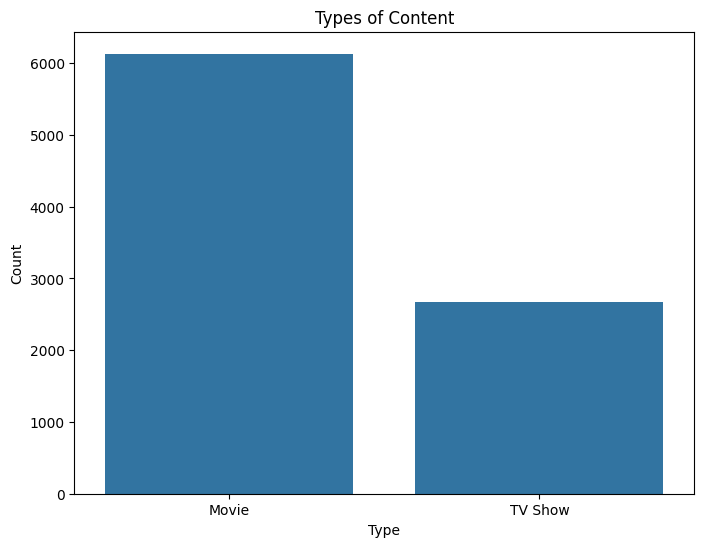

In [ ]:
# b. For graphical analysis:

# Count plot for type of content without duplicates
data1 = data.drop_duplicates(subset = 'title')
type_counts = data1['type'].value_counts()
plt.figure(figsize=(8, 6))
sns.countplot(data = data1, x='type')
plt.title('Types of Content')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

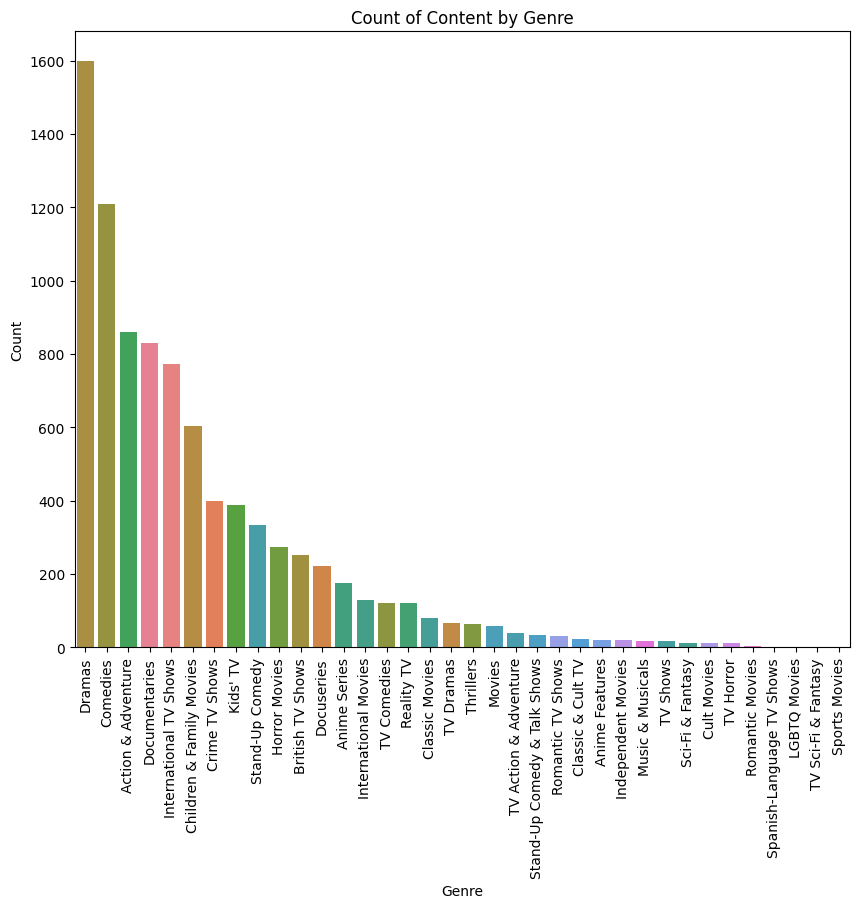

In [ ]:
# Count plot for types of content
genre_counts = data1['listed_in'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.countplot(data = data1, x = 'listed_in', order = genre_counts.index, hue = 'listed_in')
plt.title('Count of Content by Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

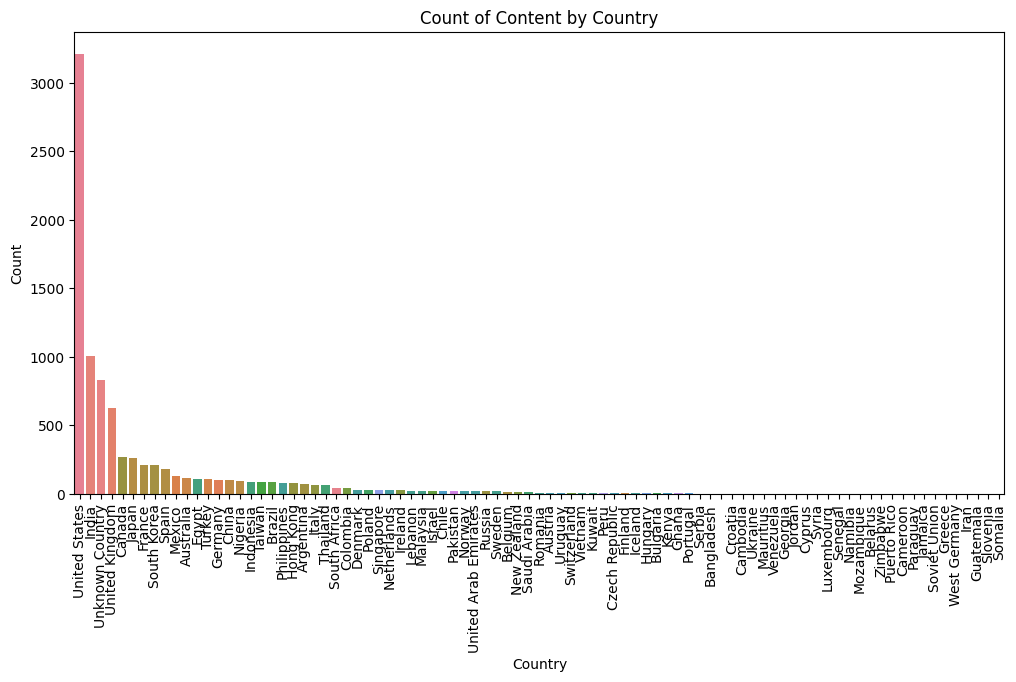

In [ ]:
# Count plot for different countries
count1 = data1['country'].value_counts().sort_values(ascending=False)

plt.figure(figsize = (12, 6))
sns.countplot(data = data1, x = 'country', order = count1.index, hue = 'country')
plt.title('Count of Content by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

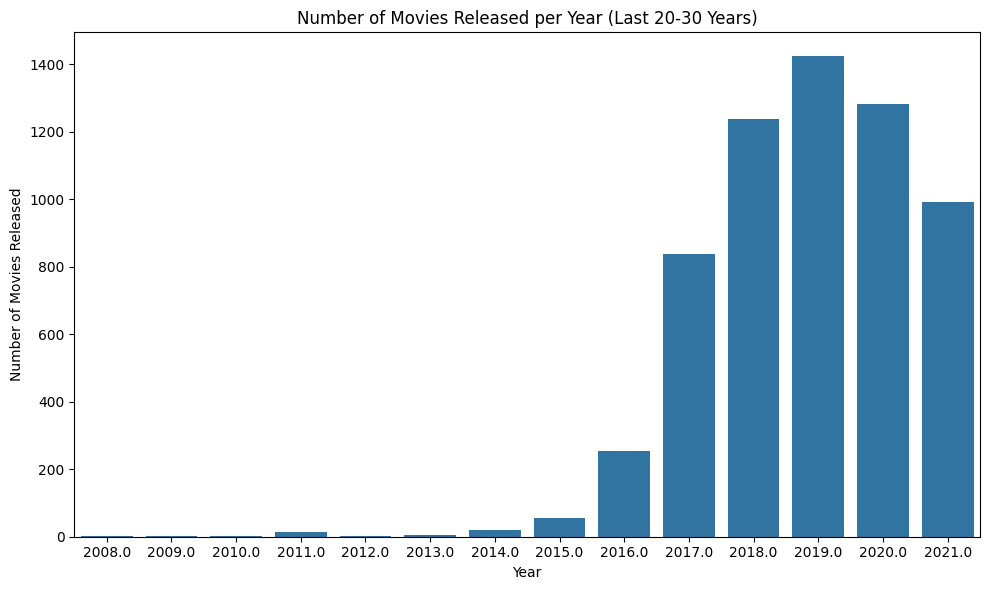

In [ ]:
# 1. How has the number of movies released per year changed over the last 20-30 years?

# Using original datset because we need only the count of movies
movies = df[df['type'] == 'Movie']

# Extracting year from the 'date_added' column
movies['year_added'] = pd.to_datetime(df['date_added'], errors = 'coerce').dt.year

# Plot the trend of the number of movies released per year
plt.figure(figsize=(10, 6))
sns.countplot(data = movies, x = 'year_added')
plt.title('Number of Movies Released per Year (Last 20-30 Years)')
plt.xlabel('Year')
plt.ylabel('Number of Movies Released')
plt.tight_layout()
plt.show()

#Insights :
As we can see the number of movies released has gradually increased over the span of time. The highest can be observed in 2019 and the drop could be possibly because of the no.of TV shows available that could interest the audience more than movies.

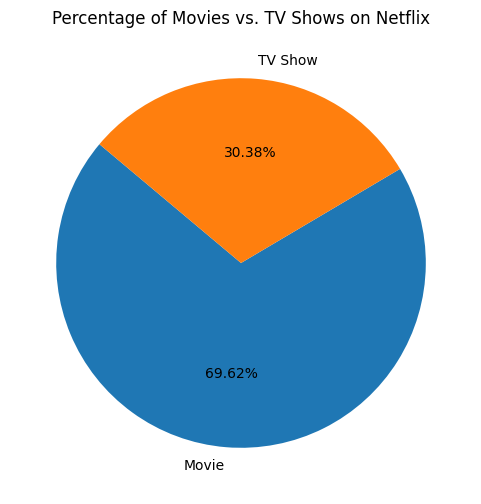

In [ ]:
# 2. Comparison of tv shows vs. movies.
# Comparing the type of content
# Grouping by type and counting the number of movies and TV shows
type_counts = df['type'].value_counts()

# Plot the comparison
plt.figure(figsize=(6,6))
plt.pie(type_counts, labels = type_counts.index, autopct='%1.2f%%', startangle=140)
plt.title('Percentage of Movies vs. TV Shows on Netflix')
plt.show()

#Insights:
The content of Movie type is available more than the TV shows.

In [ ]:
# 2. Comparison of tv shows vs. movies.

data_cont = data[data['country'] != 'Unknown Country']
movies_data = data_cont[data_cont['type'] == 'Movie']
tv_shows_data = data_cont[data_cont['type'] == 'TV Show']

# Grouping data by country and counting the number of unique titles for movies and TV shows
movies_by_country = movies_data.groupby('country')['title'].nunique().sort_values(ascending=False)
tv_shows_by_country = tv_shows_data.groupby('country')['title'].nunique().sort_values(ascending=False)

# Top 10 countries for movies and TV shows
top_10_movies_countries = movies_by_country.head(10)
top_10_tv_shows_countries = tv_shows_by_country.head(10)

print("Top 10 countries by number of movies produced:")
print(top_10_movies_countries)
print("\nTop 10 countries by number of TV shows produced:")
print(top_10_tv_shows_countries)

Top 10 countries by number of movies produced:
country
United States     2752
India              962
United Kingdom     534
Canada             319
France             303
Germany            182
Spain              171
Japan              119
China              114
Mexico             111
Name: title, dtype: int64

Top 10 countries by number of TV shows produced:
country
United States     938
United Kingdom    272
Japan             199
South Korea       170
Canada            126
France             90
India              84
Taiwan             70
Australia          66
Spain              61
Name: title, dtype: int64


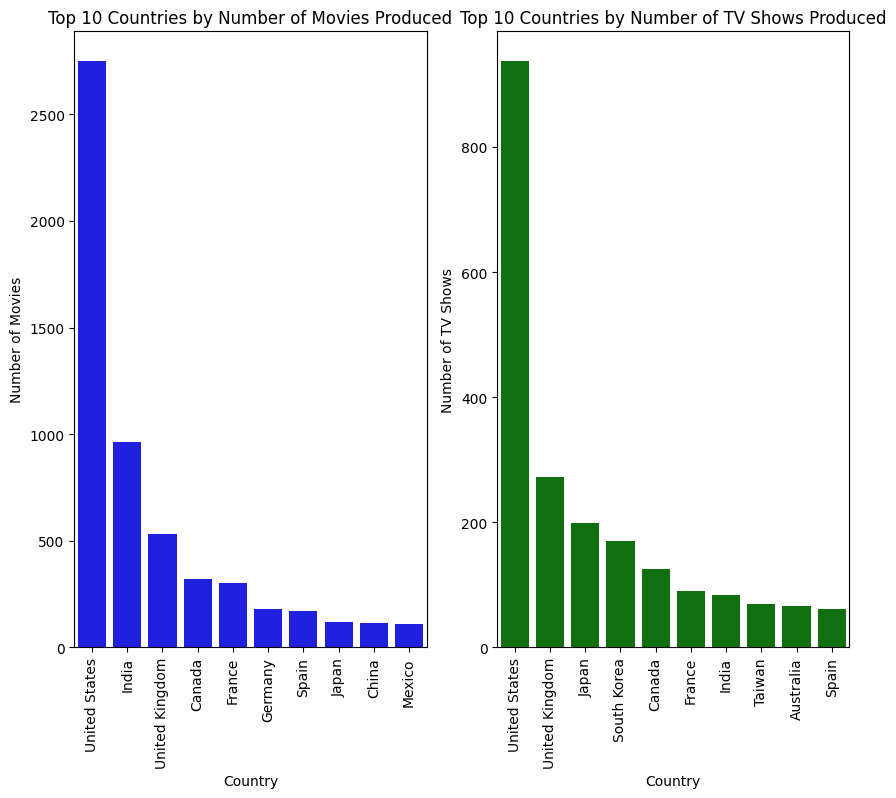

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 8))

# Countplot for movies
sns.barplot(data = top_10_movies_countries.reset_index(), x='country', y='title', color='blue', ax=axes[0])
axes[0].set_title('Top 10 Countries by Number of Movies Produced')
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Number of Movies')
axes[0].tick_params(axis = 'x', rotation = 90)

# Countplot for TV shows
sns.barplot(data=top_10_tv_shows_countries.reset_index(), x='country', y='title', color='green', ax=axes[1])
axes[1].set_title('Top 10 Countries by Number of TV Shows Produced')
axes[1].set_xlabel('Country')
axes[1].set_ylabel('Number of TV Shows')
axes[1].tick_params(axis = 'x', rotation = 90)

#Insights:
As you can see, the number of movies produced is much greater than that of TV Shows. One reason could be because TV Shows run much longer than movies hence, when they run in multiple seasons over the years their count would lesser compared to movies. Also as we can see the lead position in producing Movies as well as TV Shows has been captured by the United States.

In [ ]:
# 3. What is the best time to launch a TV show?

# Extracting week and month from 'date_added'
df['week_added'] = df['date_added'].dt.week
df['month_added'] = df['date_added'].dt.month_name()

# Grouping the data by week and month and counting the number of TV shows and movies that were released
by_week = df.groupby(['type', 'week_added']).size()
by_month = df.groupby(['type', 'month_added']).size()

# Finding the best week and month to release TV shows and movies
best_week_tv_shows = by_week['TV Show'].sort_values(ascending=False).index[0]
best_week_movies = by_week['Movie'].sort_values(ascending=False).index[0]
best_month_tv_shows = by_month['TV Show'].sort_values(ascending=False).index[0]
best_month_movies = by_month['Movie'].sort_values(ascending=False).index[0]

print("Best week to release TV shows:", f"{best_week_tv_shows.astype(int)}th week of the year")
print("Best week to release movies:", f"{best_week_movies.astype(int)}st week of year")
print("Best month to release TV shows:", best_month_tv_shows)
print("Best month to release movies:", best_month_movies)

Best week to release TV shows: 27th week of the year
Best week to release movies: 1st week of year
Best month to release TV shows: December
Best month to release movies: July


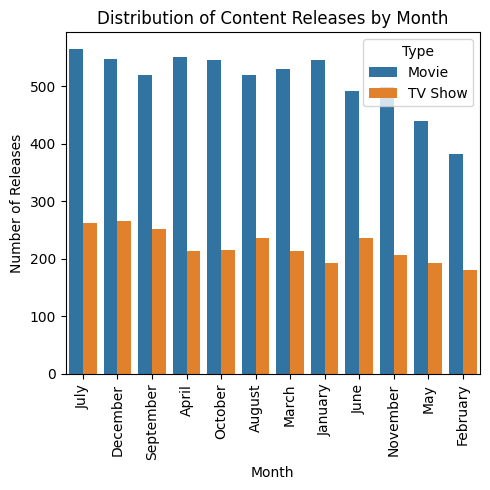

In [ ]:
# Plotting distribution of content releases by month
plt.figure(figsize=(5, 5))
sns.countplot(data = df, x ='month_added', hue = 'type', order = df['month_added'].value_counts().index)
plt.title('Distribution of Content Releases by Month')
plt.xlabel('Month')
plt.ylabel('Number of Releases')
plt.xticks(rotation=90)
plt.legend(title='Type')
plt.tight_layout()
plt.show()

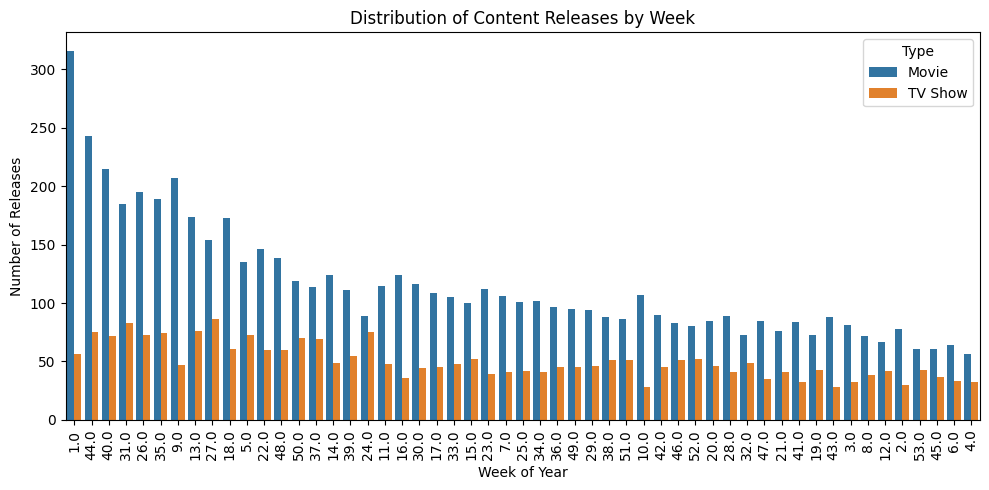

In [ ]:
# Plotting distribution of content releases by week
plt.figure(figsize = (10, 5))
sns.countplot(data = df, x = 'week_added', hue = 'type', order = df['week_added'].value_counts().index)
plt.title('Distribution of Content Releases by Week')
plt.xlabel('Week of Year')
plt.ylabel('Number of Releases')
plt.legend(title='Type')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

#Insights:
As per the data, the best month to release movies has been found to be the month of July and for TV Shows it's December.
Ans week wise, it is better to release TV Shows around 27th week which is the month of July and for movies it is 1st week which is almost close to December again.

In [ ]:
# 4. Analysis of actors/directors of different types of shows/movies.

# Separating movies and TV shows
data = data[data['director'] != 'Unknown Director']
movies_data = data[data['type'] == 'Movie']
tv_shows_data = data[data['type'] == 'TV Show']

# To get top 10 directors based on the count of unique titles
def top_directors(data):
    top_directors = data.groupby('director')['title'].nunique().sort_values(ascending=False).head(10)
    return top_directors

top_directors_movies = top_directors(movies_data)
top_directors_tv_shows = top_directors(tv_shows_data)

print("Top 10 directors for movies:")
print(top_directors_movies)
print("\nTop 10 directors for TV shows:")
print(top_directors_tv_shows)

Top 10 directors for movies:
director
Rajiv Chilaka          22
Jan Suter              21
Raúl Campos            19
Suhas Kadav            16
Marcus Raboy           15
Jay Karas              15
Cathy Garcia-Molina    13
Jay Chapman            12
Martin Scorsese        12
Youssef Chahine        12
Name: title, dtype: int64

Top 10 directors for TV shows:
director
Ken Burns                3
Alastair Fothergill      3
Stan Lathan              2
Jung-ah Im               2
Joe Berlinger            2
Hsu Fu-chun              2
Gautham Vasudev Menon    2
Lynn Novick              2
Iginio Straffi           2
Shin Won-ho              2
Name: title, dtype: int64


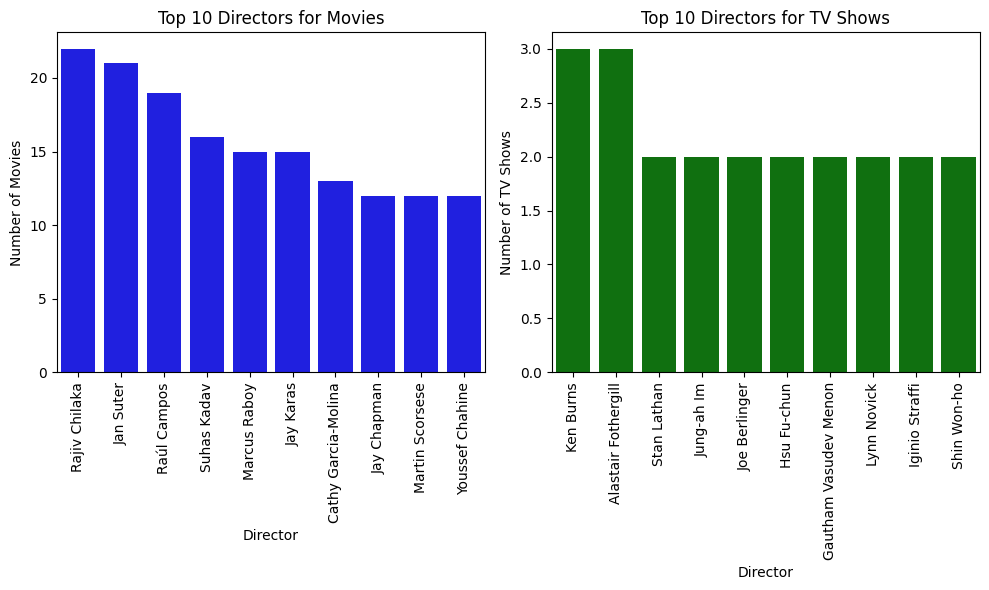

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Plot countplot for movies
sns.barplot(data = top_directors_movies.reset_index(), x = 'director', y = 'title', color = 'blue', ax=axes[0])
axes[0].set_title('Top 10 Directors for Movies')
axes[0].set_xlabel('Director')
axes[0].set_ylabel('Number of Movies')
axes[0].tick_params(axis='x', rotation = 90)

# Plot countplot for TV shows
sns.barplot(data=top_directors_tv_shows.reset_index(), x = 'director', y = 'title', color = 'green', ax=axes[1])
axes[1].set_title('Top 10 Directors for TV Shows')
axes[1].set_xlabel('Director')
axes[1].set_ylabel('Number of TV Shows')
axes[1].tick_params(axis='x', rotation = 90)

plt.tight_layout()
plt.show()

#Insights:
The top 10 directors for Movies and TV Shows can be seen in this plot.
The best director for Movies being Rajiv Chilaka and for TV Shows is Ken Burns.

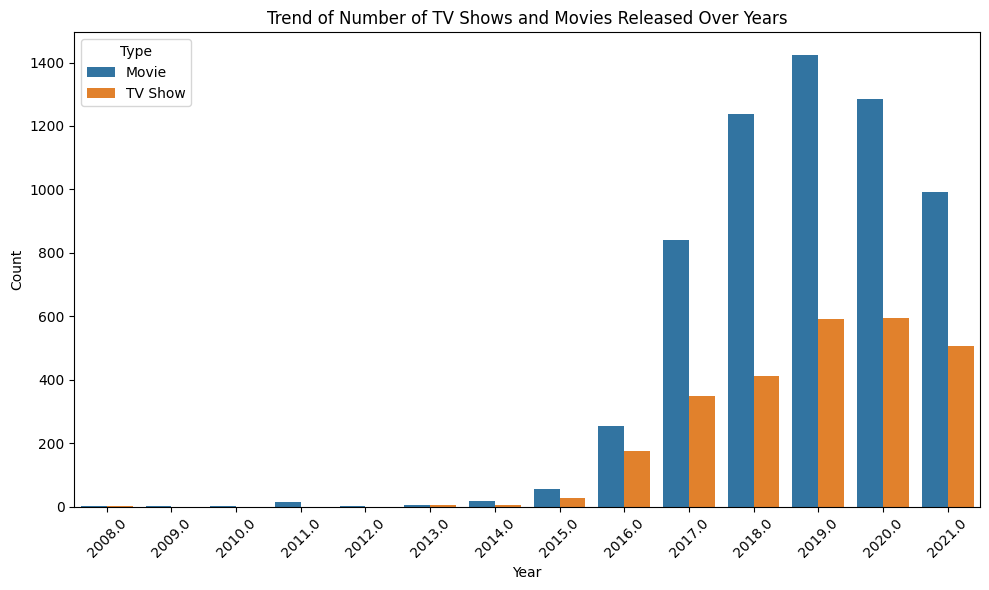

In [ ]:
# 5. Does Netflix has more focus on TV Shows than movies in recent years

# Extracting year from 'date_added' and removing duplicates
data1['year_added'] = data1['date_added'].dt.year

# Plotting the countplot of the number of TV shows and movies released over the years
plt.figure(figsize = (10, 6))
sns.countplot(data = data1, x = 'year_added', hue = 'type')
plt.title('Trend of Number of TV Shows and Movies Released Over Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title = 'Type')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

#Insights:
As we can see, in the recent years Netflix has not focussed more on TV Shows than Movies. Every year the count of movies released is greated than the TV Shows.

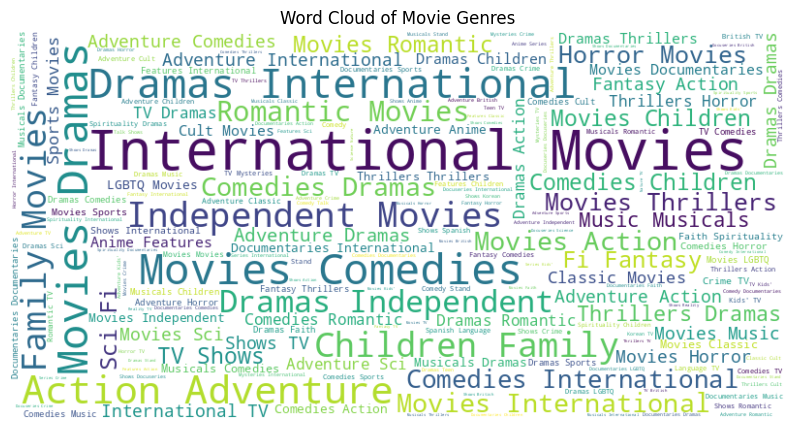

In [ ]:
# 5. Which genre movies are more popular or produced more
from wordcloud import WordCloud
# Generating a word cloud for genres
movies_data = data[data['type'] == 'Movie']
genres_text = ' '.join(data['listed_in'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(genres_text)

# Plotting the wordcloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Movie Genres')
plt.axis('off')
plt.show()

#Insights:
Here as we can see, the movie genres like International Movies,
Action, Adventure, Comedy movies etc are some of the most popular genres of movies.

In [ ]:
# 6. Find After how many days the movie will be added to Netflix after the release of the movie (you can consider the recent past data)

movies_data = df[df['type'] == 'Movie']

# Assuming 'date_added' and 'release_year' columns are in datetime format
movies_data['days_to_addition'] = (movies_data['date_added'] - pd.to_datetime(movies_data['release_year'], format='%Y')).dt.days

# Calculate the mode of the differences
mode_days_to_addition = movies_data['days_to_addition'].mode()[0]

print("The most common number of days between movie release and addition to Netflix is:", mode_days_to_addition, "days.")


The most common number of days between movie release and addition to Netflix is: 334 days.


In [ ]:
df['months_to_add'] = ((df['date_added'] - pd.to_datetime(df['release_year'], format='%Y')).dt.days)/30

# Find the mode of the difference
mode_days_to_add = df['months_to_add'].mode()[0]

print("Mode of Months to add to Netflix:", round(mode_days_to_add))

Mode of Months to add to Netflix: 11


#Insights:
Here as we can see about a mode value of 11 months after the release, the movies are added to Netflix.